## Analysis of Covid-Tracking Data by US States

Utilizing tracked data recorded from the Covid Tracking Project and estimates of 2020 populations by State from World Population Review.

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import scipy.stats
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.cm import get_cmap, register_cmap

In [3]:
from IPython import display
import ipywidgets
from ipywidgets.embed import embed_minimal_html

In [4]:
from ipywidgets import interact, widgets

In [5]:
import stat_functions as st

In [6]:
%matplotlib inline

In [7]:
tracking = pd.read_csv('tracking_clean.csv')

In [8]:
tracking.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
tracking.columns

Index(['Data_Completeness_Score_Name', 'People_Positive_New_Cases_Count',
       'People_Positive_Cases_Count', 'People_Negative_New_Count',
       'People_Negative_Cases_Count', 'People_Test_Results_New_Count',
       'People_Pending_Cases_Count', 'Total_Tested_Positive_per_100k',
       'New_Cases_per_100k_Prevalence',
       'People_Positive_Negative_Test_Results_Count',
       'People_Hospitalized_New_Count', 'People_Hospitalized_Currently_Count',
       'People_Hospitalized_Cumulative_Count',
       'Hospitalizations_per_100k_Incidence',
       'People_In_Intensive_Care_Currently_Count',
       'People_In_Intensive_Care_Cumulative_Count',
       'People_Intubated_Currently_Count', 'People_Intubated_Cumulative_Count',
       'People_Death_New_Count', 'People_Death_Count', 'Deaths_per_100k',
       'Death_Rate_Prevalence', 'Death_Rate_Incidence',
       'People_Recovered_Count', 'Recovery_Rate', 'Report_Date',
       'Reported_Date_Time', 'Day', 'Month', 'Province_State_Code', 'Pop'

In [10]:
tracking.Reported_Date_Time = tracking.Reported_Date_Time.apply(lambda x: pd.to_datetime(x))

In [11]:
tracking.Data_Completeness_Score_Name.unique()

array(['A', 'B', 'C', 'A+', 'D', 'F', nan], dtype=object)

In [12]:
complete_tracking = tracking[(tracking.Data_Completeness_Score_Name != 'D') &\
                             (tracking.Data_Completeness_Score_Name != 'F')]

In [46]:
complete_tracking[3000:3500:2]

,Data_Completeness_Score_Name,People_Positive_New_Cases_Count,People_Positive_Cases_Count,People_Negative_New_Count,People_Negative_Cases_Count,People_Test_Results_New_Count,People_Pending_Cases_Count,Total_Tested_Positive_per_100k,New_Cases_per_100k_Prevalence,People_Positive_Negative_Test_Results_Count,...,Death_Rate_Prevalence,Death_Rate_Incidence,People_Recovered_Count,Recovery_Rate,Report_Date,Reported_Date_Time,Day,Month,Province_State_Code,Pop
3185,A+,763,32908.0,9074,179718.0,9837,518.0,381.488510,8.845136,212626,...,4.325033,3.263644,4523.0,13.744378,5/20/2020,2020-05-19 17:00:00,140.0,5.0,VA,8626210.0
3187,B,0,944.0,0,24114.0,0,NaN,150.303872,0.000000,25058,...,0.000000,5.720339,824.0,87.288136,5/20/2020,2020-05-20 00:00:00,141.0,5.0,VT,628061.0
3189,A+,577,15269.0,6063,154300.0,6640,211.0,260.930491,9.860298,169569,...,2.426343,3.150174,7728.0,50.612352,5/20/2020,2020-05-20 00:00:00,141.0,5.0,WI,5851750.0
3191,C,21,787.0,969,18053.0,990,NaN,138.794586,3.703540,18840,...,4.761905,1.397713,528.0,67.090216,5/20/2020,2020-05-20 16:15:00,141.0,5.0,WY,567025.0
3193,B,290,12376.0,153,145190.0,443,NaN,252.127889,5.907974,157566,...,5.172414,4.072398,NaN,NaN,5/19/2020,2020-05-18 00:00:00,139.0,5.0,AL,4908620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,B,1000,39869.0,22921,485828.0,23921,NaN,135.276175,3.393016,525697,...,1.200000,2.759036,21713.0,54.460859,5/11/2020,2020-05-10 16:35:00,131.0,5.0,TX,29472300.0
3689,A+,989,25070.0,6573,125547.0,7562,432.0,290.625895,11.465058,150617,...,1.112235,3.390507,3273.0,13.055445,5/11/2020,2020-05-10 17:00:00,131.0,5.0,VA,8626210.0
3691,B,1,927.0,630,18797.0,631,NaN,147.597128,0.159220,19724,...,0.000000,5.717368,785.0,84.681769,5/11/2020,2020-05-11 00:00:00,132.0,5.0,VT,628061.0
3693,A+,226,11920.0,2870,108033.0,3096,180.0,203.699748,3.862093,119953,...,3.982301,3.431208,5176.0,43.422819,5/11/2020,2020-05-11 00:00:00,132.0,5.0,WI,5851750.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


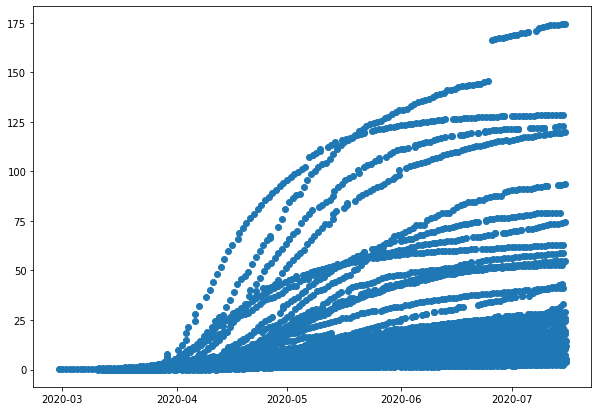

In [14]:
plt.figure(figsize = (10,7))
dates = matplotlib.dates.date2num(complete_tracking.Reported_Date_Time.values)

matplotlib.pyplot.plot_date(dates, complete_tracking.Deaths_per_100k.values)

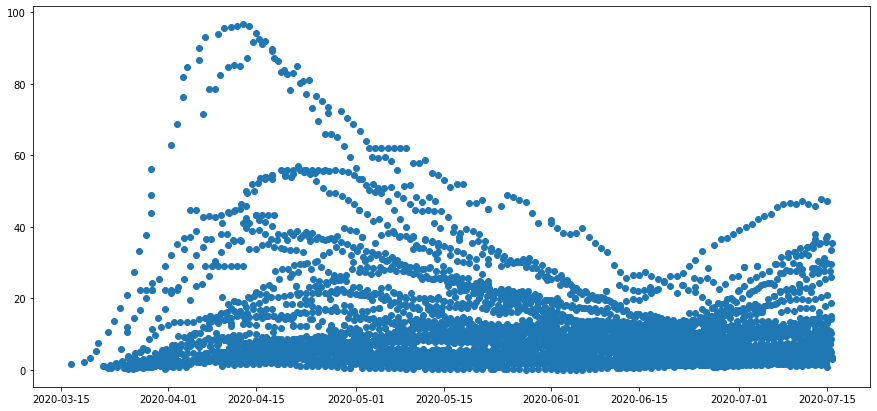

In [15]:
plt.figure(figsize = (15,7))
dates = matplotlib.dates.date2num(complete_tracking.Reported_Date_Time.values)
color = complete_tracking.Death_Rate_Incidence

matplotlib.pyplot.plot_date(dates, complete_tracking.Hospitalizations_per_100k_Incidence.values)

In [16]:
complete_tracking.Death_Rate_Incidence.describe()

count    6501.000000
mean        3.563289
std         2.206006
min         0.000000
25%         2.007188
50%         3.399282
75%         4.761905
max        25.000000
Name: Death_Rate_Incidence, dtype: float64

Text(0.5, 1.0, 'Incidence of Hospitalizations in 2020 \n(Red density indicates State Death Rate)')

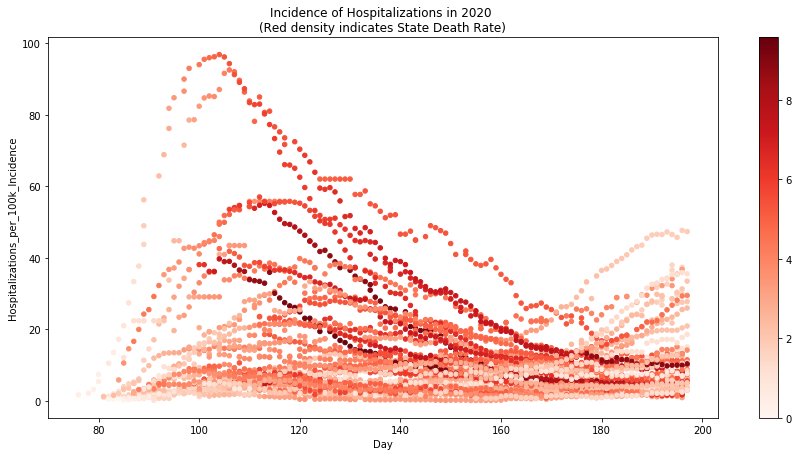

In [28]:
color = complete_tracking.Death_Rate_Incidence
complete_tracking.plot.scatter('Day','Hospitalizations_per_100k_Incidence', c = color,
                              colormap=matplotlib.cm.get_cmap('Reds'), figsize = (15,7), sharex = False)
plt.title('Incidence of Hospitalizations in 2020 \n(Red density indicates State Death Rate)')

In [18]:
def plot_hosp(state):
    data = tracking[tracking.Province_State_Code == state]
    color = data.Death_Rate_Prevalence
    data.plot.scatter('Day','Hospitalizations_per_100k_Incidence', c = color,
                              colormap=matplotlib.cm.get_cmap('Reds'),vmin = -2, figsize = (15,7),
                     sharex = False)
    plt.title('Incidence of Hospitalizations in 2020 \n(Red density indicates State Death Rate)')

In [19]:
tracking.columns

Index(['Data_Completeness_Score_Name', 'People_Positive_New_Cases_Count',
       'People_Positive_Cases_Count', 'People_Negative_New_Count',
       'People_Negative_Cases_Count', 'People_Test_Results_New_Count',
       'People_Pending_Cases_Count', 'Total_Tested_Positive_per_100k',
       'New_Cases_per_100k_Prevalence',
       'People_Positive_Negative_Test_Results_Count',
       'People_Hospitalized_New_Count', 'People_Hospitalized_Currently_Count',
       'People_Hospitalized_Cumulative_Count',
       'Hospitalizations_per_100k_Incidence',
       'People_In_Intensive_Care_Currently_Count',
       'People_In_Intensive_Care_Cumulative_Count',
       'People_Intubated_Currently_Count', 'People_Intubated_Cumulative_Count',
       'People_Death_New_Count', 'People_Death_Count', 'Deaths_per_100k',
       'Death_Rate_Prevalence', 'Death_Rate_Incidence',
       'People_Recovered_Count', 'Recovery_Rate', 'Report_Date',
       'Reported_Date_Time', 'Day', 'Month', 'Province_State_Code', 'Pop'

Make the y widget a pull down option of other info to plot against the day of the year, like intubations, postive cases, etc.

In [20]:
states = tracking.Province_State_Code.unique()
states.sort()
y_vals = ['People_Positive_New_Cases_Count','New_Cases_per_100k_Prevalence','Hospitalizations_per_100k_Incidence',
         'Death_Rate_Incidence','People_Recovered_Count', 'Recovery_Rate']
x_widget = widgets.Dropdown(options = states)
y_widget = widgets.Dropdown(options = y_vals)

In [21]:
interact(plot_hosp, state = x_widget)

interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', '…

<function __main__.plot_hosp(state)>

In [22]:
def plot_hosp(state, response):
    data = tracking[tracking.Province_State_Code == state]
    color = data.Death_Rate_Prevalence
    data.plot.scatter('Day',response, c = color,
                              colormap=matplotlib.cm.get_cmap('Reds'),vmin =-4,figsize = (16,8),
                     sharex = False)
    plt.title('Red density indicates State Death Rate Prevalence for that Period')

In [23]:
tracking.Death_Rate_Prevalence.describe()

count    7409.000000
mean        3.563080
std        11.703862
min      -226.666667
25%         0.000000
50%         1.538462
75%         4.694836
max       617.434211
Name: Death_Rate_Prevalence, dtype: float64

In [24]:
interact(plot_hosp, state = x_widget, response = y_widget)

interactive(children=(Dropdown(description='state', options=('AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', '…

<function __main__.plot_hosp(state, response)>

In [27]:
tracking.People_Death_New_Count.describe()

count    7409.000000
mean       17.491564
std        55.361857
min      -213.000000
25%         0.000000
50%         3.000000
75%        14.000000
max      1877.000000
Name: People_Death_New_Count, dtype: float64

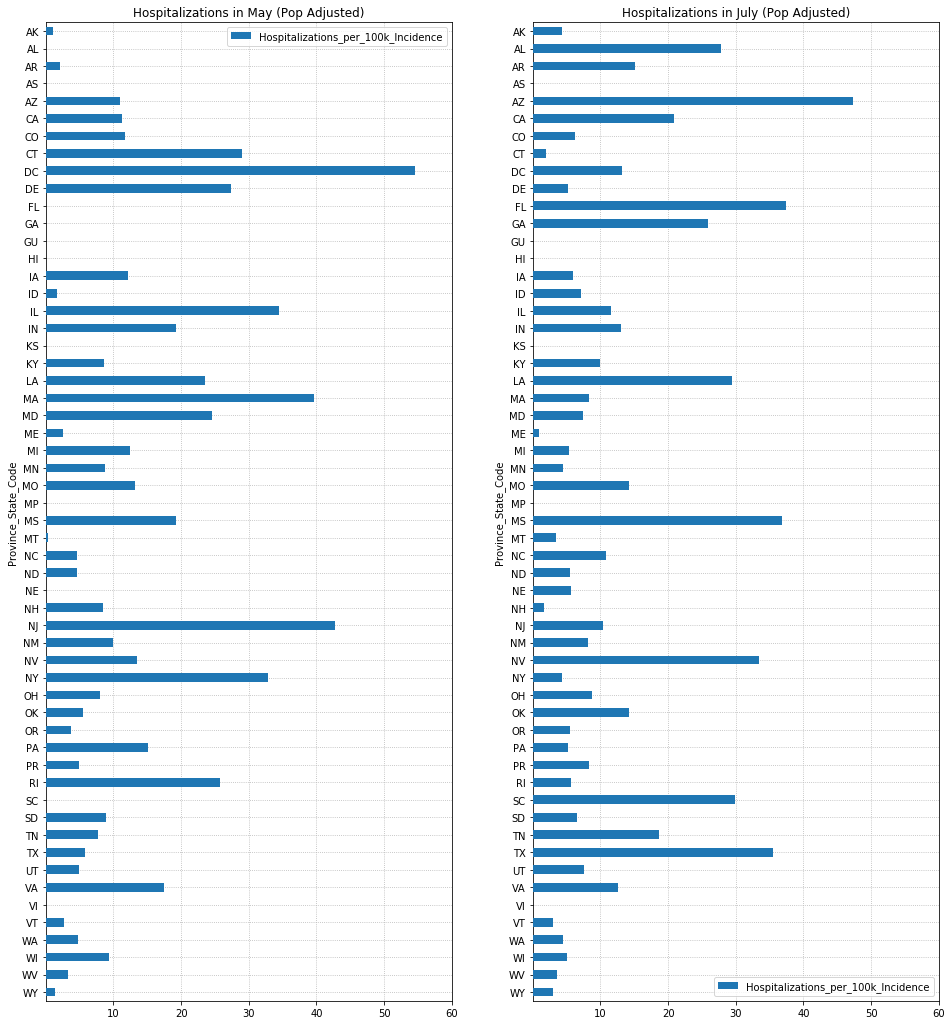

In [84]:
ax = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
midmay = tracking[tracking.Report_Date == '5/15/2020']
most_recent = tracking[tracking.Report_Date == '7/15/2020']
most_recent.plot.barh('Province_State_Code', 'Hospitalizations_per_100k_Incidence', figsize = (16,18), ax = ax1,
                     zorder = 3)
ax1.set_title("Hospitalizations in July (Pop Adjusted)")
ax1.invert_yaxis()
ax1.grid(linestyle = ':', zorder = 0)
ax1.set_xticks([10, 20, 30, 40, 50, 60])
midmay.plot.barh('Province_State_Code', 'Hospitalizations_per_100k_Incidence',figsize = (16,18), ax = ax, zorder = 3)
ax.set_title("Hospitalizations in May (Pop Adjusted)")
ax.invert_yaxis()
ax.grid(linestyle = ':', zorder = 0)
ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.savefig('Hospitalizations_May_July.png')

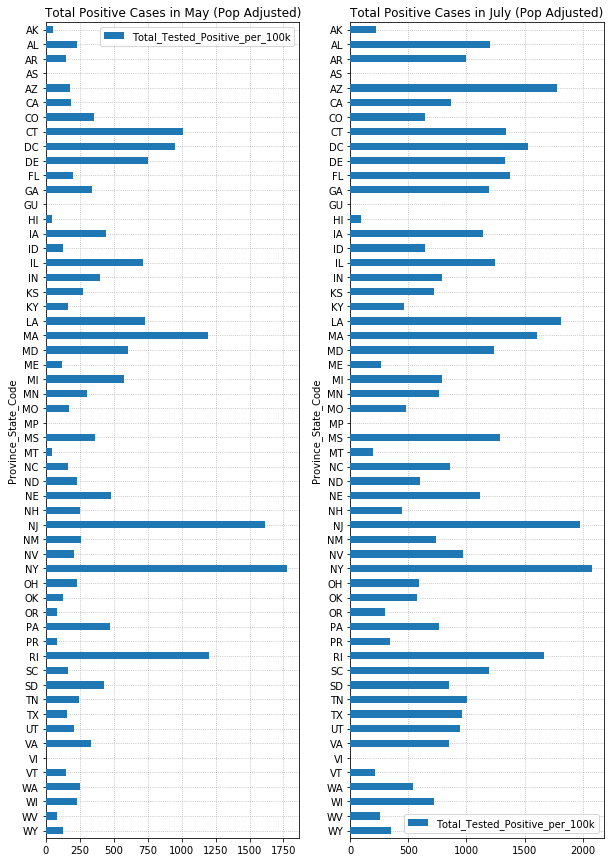

In [77]:
ax = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
midmay = tracking[tracking.Report_Date == '5/15/2020']
most_recent = tracking[tracking.Report_Date == '7/15/2020']
most_recent.plot.barh('Province_State_Code', 'Total_Tested_Positive_per_100k', figsize = (10,15), ax = ax1,
                     zorder = 3)
ax1.set_title("Total Positive Cases in July (Pop Adjusted)")
ax1.invert_yaxis()
ax1.grid(linestyle = ':', zorder = 0)
midmay.plot.barh('Province_State_Code', 'Total_Tested_Positive_per_100k',figsize = (10,15), ax = ax, zorder = 3)
ax.set_title("Total Positive Cases in May (Pop Adjusted)")
ax.invert_yaxis()
ax.grid(linestyle = ':', zorder = 0)
#plt.savefig('Total_Pos_Cases_May_July.png')

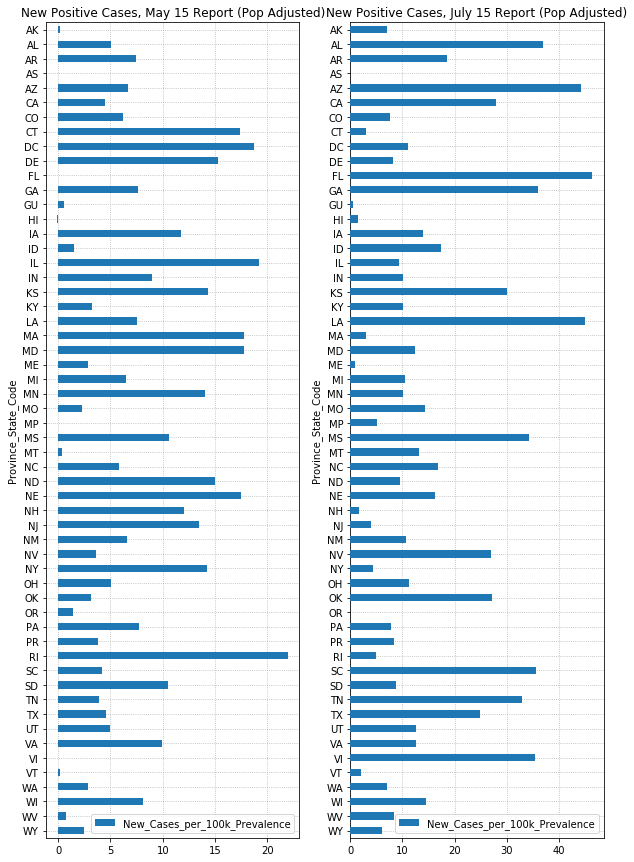

In [76]:
ax = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
midmay = tracking[tracking.Report_Date == '5/15/2020']
most_recent = tracking[tracking.Report_Date == '7/15/2020']
most_recent.plot.barh('Province_State_Code', 'New_Cases_per_100k_Prevalence', figsize = (10,15), ax = ax1,
                     zorder = 3)
ax1.set_title("New Positive Cases, July 15 Report (Pop Adjusted)")
ax1.invert_yaxis()
ax1.grid(linestyle = ':', zorder = 0)
midmay.plot.barh('Province_State_Code', 'New_Cases_per_100k_Prevalence',figsize = (10,15), ax = ax, zorder = 3)
ax.set_title("New Positive Cases, May 15 Report (Pop Adjusted)")
ax.invert_yaxis()
ax.grid(linestyle = ':', zorder = 0)

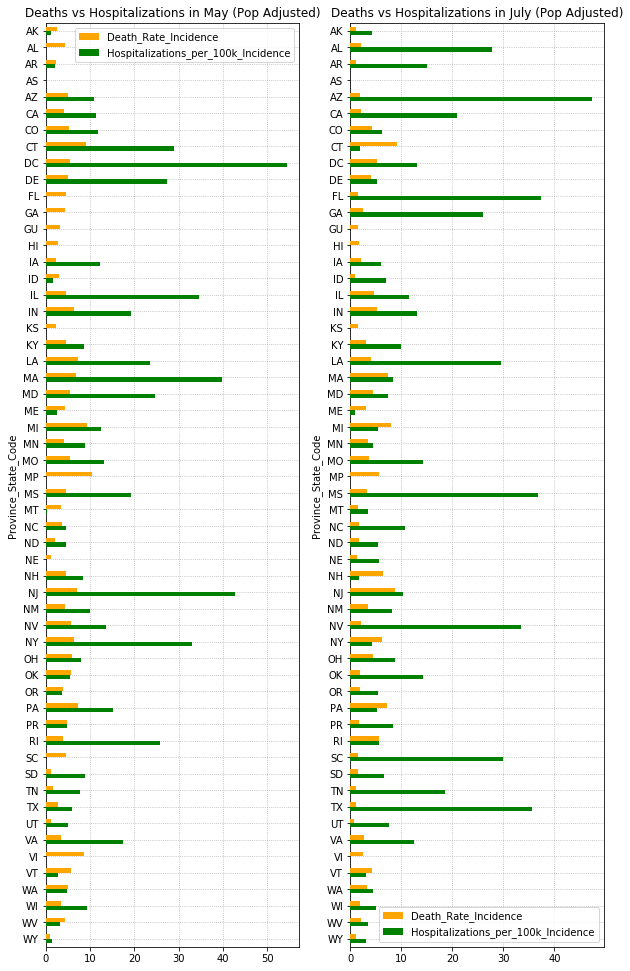

In [78]:
ax = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
midmay = tracking[tracking.Report_Date == '5/15/2020']
most_recent = tracking[tracking.Report_Date == '7/15/2020']
most_recent.plot.barh('Province_State_Code', ['Death_Rate_Incidence','Hospitalizations_per_100k_Incidence'],
                      color=['orange','green'],figsize = (10,17), ax = ax1, zorder = 3)
ax1.set_title("Deaths vs Hospitalizations in July (Pop Adjusted)")
ax1.invert_yaxis()
ax1.grid(linestyle = ':', zorder = 0)
midmay.plot.barh('Province_State_Code', ['Death_Rate_Incidence','Hospitalizations_per_100k_Incidence'],
                 color=['orange','green'],figsize = (10,17), ax = ax, zorder = 3)
ax.set_title("Deaths vs Hospitalizations in May (Pop Adjusted)")
ax.invert_yaxis()
ax.grid(linestyle = ':', zorder = 0)
#plt.savefig('Deaths_Vs_Hospitalizations_May_July.png')